# Video Processing with PyTorch

## **Introduction**

So far, we've only dealt with images. We've built **various image classification**, **detection, and segmentation models**. We've even **generated new images from practically nothing (noise)**. But images are still and static. There is no motion in static images. The real joy comes from motion. And that is how videos come into play. But what is a video, anyway?

The truth is that videos are not that more complicated than images. **A video is, in fact, a collection of sequential frames or images that are played one after another**. This sequence can be seen in the following screenshot:

![](video_seq.png)

To get a smooth video, we need to play a certain number of frames per second; otherwise, the video will look disjointed. Most of the videos that we deal with in our daily life have more than 30 frames per second. So, now, you get the idea. With that scale, a short video that's $10$ seconds long would be equivalent to $300$ images. And this multitude of images makes things complicated.

Despite this complexity, there are many applications that we can use for video processing. Some of these applications are closely related to the image processing applications that we've already studied in this book. For instance, in Chapter 3, ***Multi-Class Image Classification***, we developed a multi-class classification model to classify images into different categories. Now that we're dealing with videos, we may be interested in classifying videos too. Such an application is useful if you want to know what kind of activity is happening in a video, as opposed to what objects are present in an image. In this chapter, we will build a video classification model using PyTorch.

## **Creating the dataset**

As always, the first step is to create the dataset. We will need a training dataset to train our model and a test or validation dataset to evaluate the model. For this purpose, we will use **HMDB: a large human motion database**, which is available [here](https://serre-lab.clps.brown.edu/resource/hmdb-a-large-human-motion-database/#overview).

The HMDB dataset was collected from various sources, including movies, the Prelinger archive, YouTube, and Google videos. It is a pretty large dataset (2 GB) with a total of $7,000$ video clips. There are $51$ action classes, each containing a minimum of $101$ clips.

> or more details about the database, please refer to the following article: H. Kuehne, H. Jhuang, E. Garrote, T. Poggio, and T. Serre. HMDB: A Large Video Database for Human Motion Recognition. ICCV, 2011.

To create a dataset for video classification, **we will convert the videos into images**. Each video has hundreds of frames or images. It is not computationally feasible to process all the frames of a video. To simplify this, we will select 16 frames per video that are equally spaced across the video. Then, we will define a PyTorch dataset class. Next, **we will define the PyTorch data loaders for $2$ types of deep learning models: a recurrent neural network (RNN) model and a three-dimensional convolutional neural network ($3$-D-CNN) model**. For more details on the models, see the Creating the model recipe.

In this recipe, you will download the HMDB dataset, convert the videos clips into images, and define the PyTorch dataset and data loader classes for video classification.

### **How to do it**

We will prepare the data by converting the videos into images. Then, we will define the PyTorch dataset and the `data-loader` classes.

#### **Preparing the data**

Let's read some videos and convert them into images. Each video may contain hundreds of images. To simplify this problem, we will only use 16 frames that are equally spaced across the entire video and store them as `.jpg` files:

In [7]:
# 1 Get a list of categories in the dataset:
import os

path2data = "../data"
sub_folder = "hmdb51_org"
sub_folder_jpg = "hmdb51_jpg"
path2aCatgs = os.path.join(path2data, sub_folder)

listOfCategories = os.listdir(path2aCatgs)
listOfCategories, len(listOfCategories)

(['brush_hair',
  'cartwheel',
  'catch',
  'chew',
  'clap',
  'climb',
  'climb_stairs',
  'dive',
  'draw_sword',
  'dribble',
  'drink',
  'eat',
  'fall_floor',
  'fencing',
  'flic_flac',
  'golf',
  'handstand',
  'hit',
  'hug',
  'jump',
  'kick',
  'kick_ball',
  'kiss',
  'laugh',
  'pick',
  'pour',
  'pullup',
  'punch',
  'push',
  'pushup',
  'ride_bike',
  'ride_horse',
  'run',
  'shake_hands',
  'shoot_ball',
  'shoot_bow',
  'shoot_gun',
  'sit',
  'situp',
  'smile',
  'smoke',
  'somersault',
  'stand',
  'swing_baseball',
  'sword',
  'sword_exercise',
  'talk',
  'throw',
  'turn',
  'walk',
  'wave'],
 51)

In [8]:
# 2 Get the number of subfolders per action class:
for cat in listOfCategories:
    print("category:", cat)
    path2acat = os.path.join(path2aCatgs, cat)
    listOfSubs = os.listdir(path2acat)
    print("number of sub-folders:", len(listOfSubs))
    print("-" * 50)

category: brush_hair
number of sub-folders: 107
--------------------------------------------------
category: cartwheel
number of sub-folders: 107
--------------------------------------------------
category: catch
number of sub-folders: 102
--------------------------------------------------
category: chew
number of sub-folders: 109
--------------------------------------------------
category: clap
number of sub-folders: 130
--------------------------------------------------
category: climb
number of sub-folders: 108
--------------------------------------------------
category: climb_stairs
number of sub-folders: 112
--------------------------------------------------
category: dive
number of sub-folders: 127
--------------------------------------------------
category: draw_sword
number of sub-folders: 103
--------------------------------------------------
category: dribble
number of sub-folders: 145
--------------------------------------------------
category: drink
number of sub-folders: 1

```python
# Define two helper functions to get and store the frames from a video. These helper functions are defined in the myutils.py file, which is provided to you as part of this book. So, here, we only need to import myutils:
```

In [14]:
import myutilsvideo

```python
# You may need to install the tqdm package if you do not have it installed on your computer already. To install the tqdm package, use the following command:
```
```bash
$ pip install tqdm
```

In [17]:
# 4 Loop over the videos, get the frames, and store them as jpg files:
extension = ".avi"
n_frames = 16
for root, dirs, files in os.walk(path2aCatgs, topdown=False):
    for name in files:
        if extension not in name:
            continue
        path2vid = os.path.join(root, name)
        frames, vlen = myutilsvideo.get_frames(path2vid, n_frames= n_frames)
        path2store = path2vid.replace(sub_folder, sub_folder_jpg)
        path2store = path2store.replace(extension, "")
        print(path2store)
        os.makedirs(path2store, exist_ok=True)
        myutilsvideo.store_frames(frames, path2store)
    print("-"*50) 

../data\hmdb51_jpg\brush_hair\April_09_brush_hair_u_nm_np1_ba_goo_0
../data\hmdb51_jpg\brush_hair\April_09_brush_hair_u_nm_np1_ba_goo_1
../data\hmdb51_jpg\brush_hair\April_09_brush_hair_u_nm_np1_ba_goo_2
../data\hmdb51_jpg\brush_hair\atempting_to_brush_my_hair_brush_hair_u_nm_np2_le_goo_0
../data\hmdb51_jpg\brush_hair\atempting_to_brush_my_hair_brush_hair_u_nm_np2_le_goo_1
../data\hmdb51_jpg\brush_hair\Aussie_Brunette_Brushing_Hair_II_brush_hair_u_nm_np1_ba_goo_4
../data\hmdb51_jpg\brush_hair\Aussie_Brunette_Brushing_Hair_II_brush_hair_u_nm_np1_ri_med_3
../data\hmdb51_jpg\brush_hair\Aussie_Brunette_Brushing_Hair_II_brush_hair_u_nm_np2_le_goo_0
../data\hmdb51_jpg\brush_hair\Aussie_Brunette_Brushing_Hair_II_brush_hair_u_nm_np2_le_goo_1
../data\hmdb51_jpg\brush_hair\Aussie_Brunette_Brushing_Hair_II_brush_hair_u_nm_np2_le_med_2
../data\hmdb51_jpg\brush_hair\Aussie_Brunette_Brushing_Long_Hair_brush_hair_u_nm_np1_ba_med_3
../data\hmdb51_jpg\brush_hair\Aussie_Brunette_Brushing_Long_Hair_brush

#### **Splitting the data**

In [21]:
# 1 Let's define the data path and import myutils:
import os
import myutilsvideo

path2data = "../data"
sub_folder_jpg = "hmdb51_jpg"
path2ajpgs = os.path.join(path2data, sub_folder_jpg)

# 2 The frames of each video were stored in a folder with the same name as the video. Call the get_vids helper function from myutils to get a list of video filenames and labels:
all_vids, all_labels, catgs = myutilsvideo.get_vids(path2ajpgs) 
len(all_vids), len(all_labels), len(catgs)

(6766, 6766, 51)

In [22]:
# Let's get a snapshot of the outputs that were returned from the get_vids helper function:
all_vids[:3], all_labels[:3], catgs[:5]

(['../data\\hmdb51_jpg\\brush_hair\\April_09_brush_hair_u_nm_np1_ba_goo_0',
  '../data\\hmdb51_jpg\\brush_hair\\April_09_brush_hair_u_nm_np1_ba_goo_1',
  '../data\\hmdb51_jpg\\brush_hair\\April_09_brush_hair_u_nm_np1_ba_goo_2'],
 ['brush_hair', 'brush_hair', 'brush_hair'],
 ['brush_hair', 'cartwheel', 'catch', 'chew', 'clap'])

In [23]:
# 3 Define a Python dictionary to hold the numerical values of the labels:
labels_dict = {}
ind = 0
for uc in catgs:
    labels_dict[uc] = ind
    ind+=1
labels_dict 

{'brush_hair': 0,
 'cartwheel': 1,
 'catch': 2,
 'chew': 3,
 'clap': 4,
 'climb': 5,
 'climb_stairs': 6,
 'dive': 7,
 'draw_sword': 8,
 'dribble': 9,
 'drink': 10,
 'eat': 11,
 'fall_floor': 12,
 'fencing': 13,
 'flic_flac': 14,
 'golf': 15,
 'handstand': 16,
 'hit': 17,
 'hug': 18,
 'jump': 19,
 'kick': 20,
 'kick_ball': 21,
 'kiss': 22,
 'laugh': 23,
 'pick': 24,
 'pour': 25,
 'pullup': 26,
 'punch': 27,
 'push': 28,
 'pushup': 29,
 'ride_bike': 30,
 'ride_horse': 31,
 'run': 32,
 'shake_hands': 33,
 'shoot_ball': 34,
 'shoot_bow': 35,
 'shoot_gun': 36,
 'sit': 37,
 'situp': 38,
 'smile': 39,
 'smoke': 40,
 'somersault': 41,
 'stand': 42,
 'swing_baseball': 43,
 'sword': 44,
 'sword_exercise': 45,
 'talk': 46,
 'throw': 47,
 'turn': 48,
 'walk': 49,
 'wave': 50}

In [24]:
# 4 As we can see, there is a total of 51 categories. To simplify this problem, we will select five action classes and filter out videos:
num_classes = 5
unique_ids = [id_ for id_, label in zip(all_vids,all_labels) if labels_dict[label] < num_classes]
unique_labels = [label for id_, label in zip(all_vids,all_labels) if labels_dict[label] < num_classes]
len(unique_ids),len(unique_labels)

(555, 555)

In [25]:
# 5 Split the videos into two groups:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=2, test_size=0.1, random_state=0)
train_indx, test_indx = next(sss.split(unique_ids, unique_labels))

train_ids = [unique_ids[ind] for ind in train_indx]
train_labels = [unique_labels[ind] for ind in train_indx]
print(len(train_ids), len(train_labels)) 

test_ids = [unique_ids[ind] for ind in test_indx]
test_labels = [unique_labels[ind] for ind in test_indx]
print(len(test_ids), len(test_labels))

499 499
56 56


#### **Defining the PyTorch datasets**

In [26]:
# 1 Import the essential packages:
from torch.utils.data import Dataset, DataLoader, Subset
import glob
from PIL import Image
import torch
import numpy as np
import random
np.random.seed(2020)
random.seed(2020)
torch.manual_seed(2020)

# 2 Define the dataset class:
class VideoDataset(Dataset):
    def __init__(self, ids, labels, transform):      
        self.transform = transform
        self.ids = ids
        self.labels = labels
    def __len__(self):
        return len(self.ids)

    def __getitem__(self, idx):
        path2imgs=glob.glob(self.ids[idx]+"/*.jpg")
        path2imgs = path2imgs[:timesteps]
        label = labels_dict[self.labels[idx]]
        frames = []
        for p2i in path2imgs:
            frame = Image.open(p2i)
            frames.append(frame)

        seed = np.random.randint(1e9)        
        frames_tr = []
        for frame in frames:
            random.seed(seed)
            np.random.seed(seed)
            frame = self.transform(frame)
            frames_tr.append(frame)
        if len(frames_tr)>0:
            frames_tr = torch.stack(frames_tr)
        return frames_tr, label

# 3 Define the transformation parameters:
# choose one
model_type = "3dcnn"
model_type = "rnn" 

timesteps = 16
if model_type == "rnn":
    h, w =224, 224
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
else:
    h, w = 112, 112
    mean = [0.43216, 0.394666, 0.37645]
    std = [0.22803, 0.22145, 0.216989]

# 4 Define the image transformations for training:
import torchvision.transforms as transforms

train_transformer = transforms.Compose([
            transforms.Resize((h, w)),
            transforms.RandomHorizontalFlip(p=0.5),  
            transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),    
            transforms.ToTensor(),
            transforms.Normalize(mean, std),
        ])

# 5 Instantiate an object of the dataset class:
train_ds = VideoDataset(ids=train_ids, labels=train_labels, transform=train_transformer)
print(len(train_ds))

499


In [27]:
# 6 Get a sample item from train_ds:
imgs, label = train_ds[1]
if len(imgs) > 0:
    print(imgs.shape, label, torch.min(imgs), torch.max(imgs))

torch.Size([16, 3, 224, 224]) 3 tensor(-2.1179) tensor(2.6226)


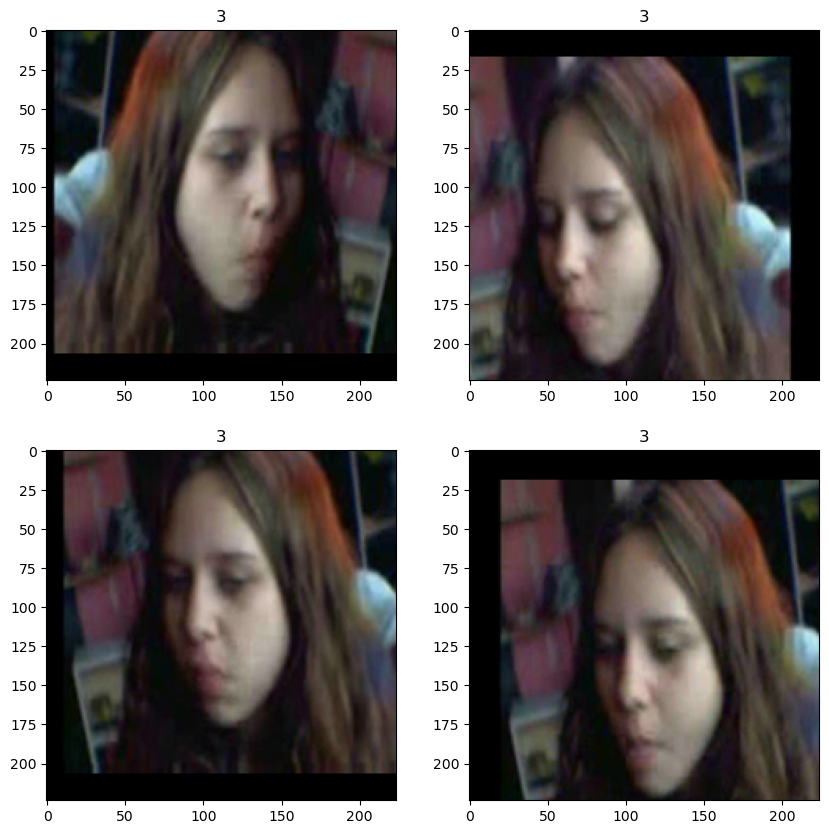

In [28]:
# 7 Let's display a few sample frames:
import matplotlib.pylab as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for ii,img in enumerate(imgs[::4]):
    plt.subplot(2,2,ii+1)
    plt.imshow(myutilsvideo.denormalize(img, mean, std))
    plt.title(label)

In [29]:
# 8 Define the transformations for the test dataset:
test_transformer = transforms.Compose([
            transforms.Resize((h,w)),
            transforms.ToTensor(),
            transforms.Normalize(mean, std),
            ])

# 9 Instantiate an object of the VideoDataset class as test_ds:
test_ds = VideoDataset(ids=test_ids, labels=test_labels, transform=test_transformer)
print(len(test_ds))

56


In [30]:
# 10 Get a sample item from test_ds:
imgs, label = test_ds[1]
imgs.shape, label, torch.min(imgs), torch.max(imgs)

(torch.Size([16, 3, 224, 224]), 3, tensor(-2.1179), tensor(2.6400))

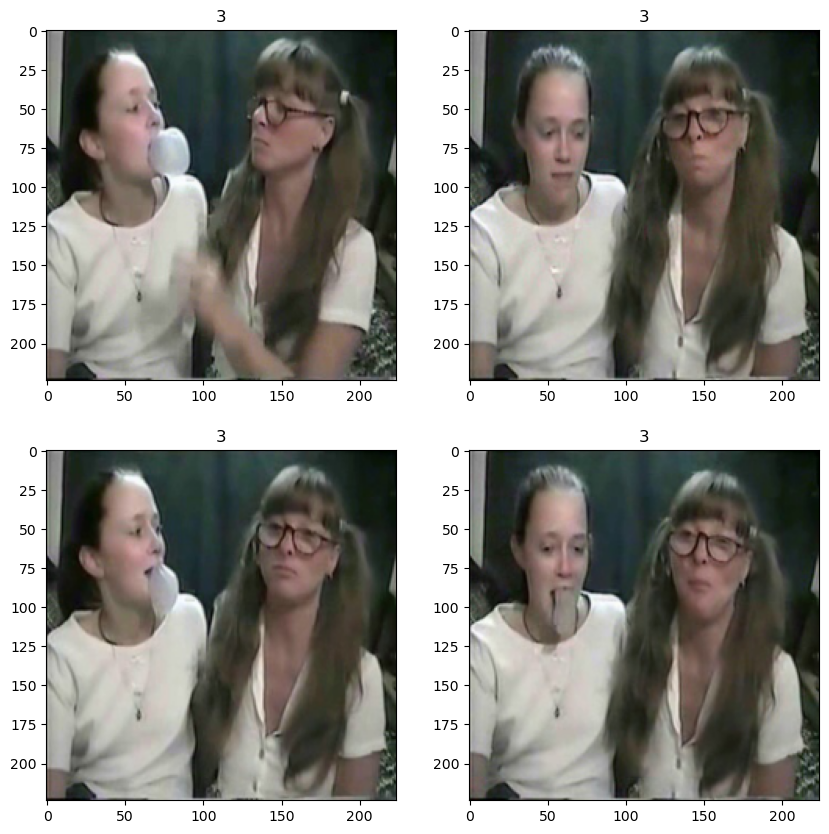

In [32]:
# 11 Let's display the sample item from test_ds:
plt.figure(figsize=(10, 10))
for ii, img in enumerate(imgs[::4]):
    plt.subplot(2, 2, ii+1)
    plt.imshow(myutilsvideo.denormalize(img, mean, std))
    plt.title(label)

#### **Defining the data loaders**

In [46]:
def collate_fn_3dcnn(batch):
    imgs_batch, label_batch = list(zip(*batch))
    imgs_batch = [imgs for imgs in imgs_batch if len(imgs)>0]
    label_batch = [torch.tensor(l) for l, imgs in zip(label_batch, imgs_batch) if len(imgs)>0]
    imgs_tensor = torch.stack(imgs_batch)
    imgs_tensor = torch.transpose(imgs_tensor, 2, 1)
    labels_tensor = torch.stack(label_batch)
    return imgs_tensor, labels_tensor

def collate_fn_rnn(batch):
    imgs_batch, label_batch = list(zip(*batch))
    imgs_batch = [imgs for imgs in imgs_batch if len(imgs)>0]
    label_batch = [torch.tensor(l) for l, imgs in zip(label_batch, imgs_batch) if len(imgs)>0]
    imgs_tensor = torch.stack(imgs_batch)
    labels_tensor = torch.stack(label_batch)
    return imgs_tensor, labels_tensor
    
# 1 Define the data loaders:
batch_size = 4
if model_type == "rnn":
    train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True, collate_fn=collate_fn_rnn)
    test_dl = DataLoader(test_ds, batch_size=2*batch_size, shuffle=False, collate_fn=collate_fn_rnn) 
else:
    train_dl = DataLoader(train_ds, batch_size= batch_size, shuffle=True, collate_fn=collate_fn_3dcnn)
    test_dl = DataLoader(test_ds, batch_size= 2*batch_size, shuffle=False, collate_fn=collate_fn_3dcnn) 


In [47]:
# 2 Now, set the model type to "3dcnn" and get a mini-batch from train_dl:
for xb, yb in train_dl:
    print(xb.shape, yb.shape)
    break

torch.Size([4, 16, 3, 224, 224]) torch.Size([4])


### **How it works**

In Preparing the data subsection, we converted the videos into images. Since loading a video is a time-consuming process, we did this step in advance. Loading images is a lot faster than loading videos. In step 1, we got the list of action categories. As expected, there were $51$ action categories. In step 2, we got the number of videos in each action category. As expected, there were more than $100$ videos per class.

In step 3, we imported myutils. This utility file contains some of the helper functions that are required for this book. To save space, we put some of the less important helper functions in the myutils.py file. Once imported, we used the helper function defined in the file. The get_frames helper function loads a video from its filename and returns the specified number of frames. The `store_frames` helper function gets the frames and stores them in the given path. There is a technical tip to pay attention to here. The well-known OpenCV package loads images in `BGR` format, so we used `cv2.cvtColor(frame, cv2.COLOR_BGR2RGB`) to convert images into RGB in the get_frames helper function. Conversely, OpenCV assumes `BGR` format when saving an image, so we used `cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)` in the `store_frames` helper function.

> OpenCV loads and stores images in BGR format. You can use `cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)` to convert images into RGB.

In step 4, we looped over the videos, got $16$ frames per videos, and stored them as `jpg` images. 

In Splitting the data subsection, we got the list of video filenames and split them into two groups for training and test. In step 1, we imported `myutils`. Essential helper functions are in this utility file. We assume that you completed the previous steps and that the necessary images are now stored in the `hmdb51_jpg` folder. In step 2, we called the `get_vids` helper function.

Using this helper function, we got the list of video filenames. As you may recall, we extracted `16` frames per video. For each video, the `16` frames were stored in a folder that had the same name as its video filename. As we saw, there are $6,766$ videos and labels. Each video has a text label corresponding to the activity of the video. Also, an excerpt from the `all_vids` and `all_labels` lists were printed.

In step 3, we defined a Python dictionary to hold the labels. Since the labels were in text format and we need a numerical equivalent for the next steps, we arbitrarily assigned a number to each action class. In step 4, we picked five action classes out of a total of 51 classes. This was done to simplify our problem. You can increase or decrease the number of classes. As we saw, when we filtered the videos to five classes, there were $703$ videos left. This reduces the data size and the complexity of the problem. In step 5, we used the `StratifiedShuffleSplit` function from `sklearn` to split the data into training and test. We separated 10 percent for the test. As we saw, after splitting, $632$ videos were in the training dataset and 71 videos were in the test dataset.

In Defining the datasets subsection, we created the `dataset` class. In step 1, we imported all the essential packages and set the random seed points for reproducibility. In step 2, we defined the dataset class, that is, `VideoDataset`. This class has three methods or functions.

The inputs to the `__init__ `function are as follows:

* `ids`: List of video filenames
* `labels`: List of categorical labels corresponding to ids
* `transform`: Image transformations function

The input to the `__getitem__` function is as follows:

* `idx`: Path to the folder containing the $16$ `.jpg` images of a video

In the function, we got the list of `.jpg` images and then loaded them as `PIL` images. Then, we performed image transformations on each image. Notice that we wanted to perform the same type of transformation on all $16$ frames of a video. Thus, we set the random seed point every time we called the transformation. This will ensure that all $16$ images will go through the same transformations.

> To force the same image transformation on sequential images, set the random seed point to a fix number before calling the transformation.

In step 3, we defined a few parameters that were needed for image transformations. These include `h, w` to resize images and `mean`, `std` to normalize images. Notice that, depending on the model, the parameters were set differently. You can choose either "`3dcnn`" or "`rnn`" as the model type. Later, we will explain each model in detail in the Defining the Model recipe. For the "`rnn`" model, we resized the images to $224 \times 224$ while for the "`3dcnn`" model, we resized the images to $112 \times 112$. The reason we did this is that the model has different pre-training configurations.

In step 4, we defined the image transformations. Notice that in addition to resizing and normalizing images, we used two data augmentation transformations: `RandomHorizontalFlip` and `RandomAffine`. In step 5, we instantiated an object of the `VideoDataset` class, that is, train_ds. As expected, there are 632 videos in the training dataset. In step 6, we got a sample item from `train_ds`. This is an exploratory step to make sure that the returned tensor is in the correct format. The returned tensor shape is in the shape of `[timesteps, 3, h, w]`, where `timesteps=16`, `h`, and `w` depend on `model_type`.

In step 7, we displayed a few sample frames from the returned tensor. In step 8, we defined transformations for the test dataset. Here, we don't need to perform data augmentation. In step 9, we instantiate an object of the `VideoDataset` class as `test_ds`. As expected, the test dataset contained $71$ videos. In step 10, we get a sample item from `test_ds`. In step 11, we displayed a few frames of the sample tensor.



## **Defining the model**

Compared to image classification, video classification is more complicated since we have to process several images at a time. As you may recall from Chapter 2, ***Binary Image Classification***, and Chapter 3, ***Multi-Class Image Classification***, we used a model based on a $2$-dimensional convolutional neural network (`2D-CNN`). One simple approach would be to process images of a video one at a time using a `2D-CNN` model and then average the outputs. However, **this approach does not consider the temporal correlation between frames**. Instead, we prefer to use a model that processes multiple images of a video in order to extract temporal correlation. To this end, we will use two different models for our video classification task.

**The first model is based on RNN architecture**. The **goal of RNN models is to extract the temporal correlation between the images by keeping a memory of past images**. The block diagram of the model is as follows:

![](rnn.png)

As we can see, the images of a video are fed to a base model to extract high-level features. The features are then fed to an RNN layer and the output of the RNN layer is connected to a fully connected layer to get the classification output. The input to this model should be in the shape of `[batch_size, timesteps, 3, height, width]`, where `timesteps=16` is the number of frames per video. We will use one of the most popular models that has been pre-trained on the ImageNet dataset, called `ResNet18`, as the base model.

The second model is an $18$-layer `Resnet3D` model, which was introduced in the following article: [***A Closer Look at Spatio-temporal Convolutions for Action Recognition***](https://arxiv.org/pdf/1711.11248.pdf).

Let's call this model `3dcnn`. The input to this model should be in the shape of `[batch_size, 3, timesteps, height, width]`. This model is available as a built-in model in the `torchvision.models.video` package. In this recipe, you will learn how to define two models for video classification.

### **How to do it**

In [48]:
# 1 Define Resnet18Rnn:
from torch import nn
class Resnt18Rnn(nn.Module):
    def __init__(self, params_model):
        super(Resnt18Rnn, self).__init__()
        num_classes = params_model["num_classes"]
        dr_rate = params_model["dr_rate"]
        pretrained = params_model["pretrained"]
        rnn_hidden_size = params_model["rnn_hidden_size"]
        rnn_num_layers = params_model["rnn_num_layers"]
        baseModel = models.resnet18(pretrained=pretrained)
        num_features = baseModel.fc.in_features
        baseModel.fc = Identity()
        self.baseModel = baseModel
        self.dropout= nn.Dropout(dr_rate)
        self.rnn = nn.LSTM(num_features, rnn_hidden_size, rnn_num_layers)
        self.fc1 = nn.Linear(rnn_hidden_size, num_classes)

    def forward(self, x):
        b_z, ts, c, h, w = x.shape
        ii = 0
        y = self.baseModel((x[:, ii]))
        output, (hn, cn) = self.rnn(y.unsqueeze(1))
        for ii in range(1, ts):
            y = self.baseModel((x[:, ii]))
            out, (hn, cn) = self.rnn(y.unsqueeze(1), (hn, cn))
        out = self.dropout(out[:, -1])
        out = self.fc1(out) 
        return out

class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()
    def forward(self, x):
        return x

# 2 Use a conditional statement to define either of the models:
from torchvision import models
from torch import nn

if model_type == "rnn":
    params_model={
        "num_classes": num_classes,
        "dr_rate": 0.1,
        "pretrained" : True,
        "rnn_num_layers": 1,
        "rnn_hidden_size": 100,}
    model = Resnt18Rnn(params_model)        
else:
    model = models.video.r3d_18(pretrained=True, progress=False)
    num_features = model.fc.in_features
    model.fc = nn.Linear(num_features, num_classes)

# 3 Let's test the model using some dummy input:
with torch.no_grad():
    if model_type=="rnn":
        x = torch.zeros(1, 16, 3, h, w)
    else:
        x = torch.zeros(1, 3, 16, h, w)
    y= model(x)
    print(y.shape)

torch.Size([1, 5])


In [49]:
# 4 Move the model to a CUDA device:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
# 5 ow, let's print the model:
print(model)

Resnt18Rnn(
  (baseModel): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, trac

### **How it works**

In step 1, we defined the `RNN` model class, that is, `Resnet18Rnn`. We used a Resnet18 model that had been pre-trained on the `ImageNet` dataset as the feature extractor. The extracted features were then fed to an RNN layer to extract the temporal correlation. The output of the RNN layer was fed to a fully connected layer to get the classification output.

In step 2, we used an if condition to choose between one of the models. If `model_type` was set to "`rnn`", the RNN model was instantiated using the `Resnet18RNN` class; otherwise, the "`3dcnn`" model was defined using PyTorch's built-in models.

In step 3, we tested the defined model to make sure everything was correct. We passed some dummy input to the model and got the expected output. Use this step to debug your models before moving on to the next steps.

In step 4, we defined a CUDA device and moved the model to the CUDA device. In step 5, we printed the model. Depending on `model_type`, the corresponding model was printed.

## **Training the model**

So far, we've defined the dataset, data loaders, and the model. You may notice that this process was similar to that of image classification, but with some changes in the data format and model. It's not surprising that we can also use the same loss function and optimizer as defined in Chapter 3, ***Multi-Class Image Classification***. Also, for the training process, we will use the same stochastic gradient descent algorithm. To avoid repetition, we've put most of the training scripts in the `myutils.py` file that's provided as part of this book. Please see Chapter 3 for more details.

In the recipe, you will learn how to train a video classification model.

### **How to do it**

Let's define the loss function and optimizer and train the model:

In [56]:
# 1 Define the loss function, optimizer, and learning rate schedule:
from torch import optim
from torch.optim.lr_scheduler import CosineAnnealingLR, ReduceLROnPlateau
import myutilsvideo

loss_func = nn.CrossEntropyLoss(reduction="sum")
opt = optim.Adam(model.parameters(), lr=3e-5)
lr_scheduler = ReduceLROnPlateau(opt, mode='min', factor=0.5, patience=5, verbose=1)
os.makedirs("../models", exist_ok=True)

# 2 Call the train_val helper function from myutils to train the model:
params_train={
    "num_epochs": 100,
    "optimizer": opt,
    "loss_func": loss_func,
    "train_dl": train_dl,
    "val_dl": test_dl,
    "sanity_check": True,
    "lr_scheduler": lr_scheduler,
    "path2weights": "../models/vidweights_" + model_type + ".pt",
}

model, loss_hist, metric_hist = myutilsvideo.train_val(model, params_train)

Epoch 0/99, current lr=3e-05


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Copied best model weights!
train loss: 0.012692, dev loss: 0.223276, accuracy: 3.57
----------
Epoch 1/99, current lr=3e-05


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Copied best model weights!
train loss: 0.013439, dev loss: 0.212753, accuracy: 7.14
----------
Epoch 2/99, current lr=3e-05


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.013171, dev loss: 0.220393, accuracy: 3.57
----------
Epoch 3/99, current lr=3e-05


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012476, dev loss: 0.225771, accuracy: 3.57
----------
Epoch 4/99, current lr=3e-05


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012846, dev loss: 0.222222, accuracy: 5.36
----------
Epoch 5/99, current lr=3e-05


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.013305, dev loss: 0.219081, accuracy: 5.36
----------
Epoch 6/99, current lr=3e-05


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012115, dev loss: 0.223481, accuracy: 5.36
----------
Epoch 7/99, current lr=3e-05


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 00008: reducing learning rate of group 0 to 1.5000e-05.
Loading best model weights!
train loss: 0.011812, dev loss: 0.228653, accuracy: 3.57
----------
Epoch 8/99, current lr=1.5e-05


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.013108, dev loss: 0.220791, accuracy: 3.57
----------
Epoch 9/99, current lr=1.5e-05


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012347, dev loss: 0.216687, accuracy: 7.14
----------
Epoch 10/99, current lr=1.5e-05


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012565, dev loss: 0.222309, accuracy: 3.57
----------
Epoch 11/99, current lr=1.5e-05


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012002, dev loss: 0.217426, accuracy: 3.57
----------
Epoch 12/99, current lr=1.5e-05


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012448, dev loss: 0.221688, accuracy: 3.57
----------
Epoch 13/99, current lr=1.5e-05


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 00014: reducing learning rate of group 0 to 7.5000e-06.
Loading best model weights!
train loss: 0.012128, dev loss: 0.226882, accuracy: 1.79
----------
Epoch 14/99, current lr=7.5e-06


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012941, dev loss: 0.228720, accuracy: 3.57
----------
Epoch 15/99, current lr=7.5e-06


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.013177, dev loss: 0.222696, accuracy: 5.36
----------
Epoch 16/99, current lr=7.5e-06


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012278, dev loss: 0.224181, accuracy: 3.57
----------
Epoch 17/99, current lr=7.5e-06


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012354, dev loss: 0.217123, accuracy: 5.36
----------
Epoch 18/99, current lr=7.5e-06


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012411, dev loss: 0.222907, accuracy: 5.36
----------
Epoch 19/99, current lr=7.5e-06


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 00020: reducing learning rate of group 0 to 3.7500e-06.
Loading best model weights!
train loss: 0.012266, dev loss: 0.216692, accuracy: 5.36
----------
Epoch 20/99, current lr=3.75e-06


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012589, dev loss: 0.219807, accuracy: 5.36
----------
Epoch 21/99, current lr=3.75e-06


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012306, dev loss: 0.225605, accuracy: 3.57
----------
Epoch 22/99, current lr=3.75e-06


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012209, dev loss: 0.232249, accuracy: 1.79
----------
Epoch 23/99, current lr=3.75e-06


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.013217, dev loss: 0.217630, accuracy: 5.36
----------
Epoch 24/99, current lr=3.75e-06


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.013634, dev loss: 0.220676, accuracy: 1.79
----------
Epoch 25/99, current lr=3.75e-06


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 00026: reducing learning rate of group 0 to 1.8750e-06.
Loading best model weights!
train loss: 0.012118, dev loss: 0.222634, accuracy: 3.57
----------
Epoch 26/99, current lr=1.875e-06


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012356, dev loss: 0.225312, accuracy: 5.36
----------
Epoch 27/99, current lr=1.875e-06


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012956, dev loss: 0.225950, accuracy: 3.57
----------
Epoch 28/99, current lr=1.875e-06


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012116, dev loss: 0.220751, accuracy: 5.36
----------
Epoch 29/99, current lr=1.875e-06


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012661, dev loss: 0.226459, accuracy: 5.36
----------
Epoch 30/99, current lr=1.875e-06


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012473, dev loss: 0.219150, accuracy: 5.36
----------
Epoch 31/99, current lr=1.875e-06


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 00032: reducing learning rate of group 0 to 9.3750e-07.
Loading best model weights!
train loss: 0.012809, dev loss: 0.216061, accuracy: 7.14
----------
Epoch 32/99, current lr=9.375e-07


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.011887, dev loss: 0.222501, accuracy: 5.36
----------
Epoch 33/99, current lr=9.375e-07


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012736, dev loss: 0.218357, accuracy: 3.57
----------
Epoch 34/99, current lr=9.375e-07


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012469, dev loss: 0.223076, accuracy: 5.36
----------
Epoch 35/99, current lr=9.375e-07


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.013240, dev loss: 0.220295, accuracy: 5.36
----------
Epoch 36/99, current lr=9.375e-07


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.009492, dev loss: 0.216071, accuracy: 7.14
----------
Epoch 37/99, current lr=9.375e-07


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 00038: reducing learning rate of group 0 to 4.6875e-07.
Loading best model weights!
train loss: 0.013379, dev loss: 0.223908, accuracy: 5.36
----------
Epoch 38/99, current lr=4.6875e-07


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012154, dev loss: 0.224565, accuracy: 5.36
----------
Epoch 39/99, current lr=4.6875e-07


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.013571, dev loss: 0.223064, accuracy: 1.79
----------
Epoch 40/99, current lr=4.6875e-07


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.011863, dev loss: 0.227934, accuracy: 1.79
----------
Epoch 41/99, current lr=4.6875e-07


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.011954, dev loss: 0.219340, accuracy: 5.36
----------
Epoch 42/99, current lr=4.6875e-07


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.013125, dev loss: 0.222820, accuracy: 3.57
----------
Epoch 43/99, current lr=4.6875e-07


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 00044: reducing learning rate of group 0 to 2.3438e-07.
Loading best model weights!
train loss: 0.013839, dev loss: 0.215991, accuracy: 5.36
----------
Epoch 44/99, current lr=2.34375e-07


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.011782, dev loss: 0.216750, accuracy: 7.14
----------
Epoch 45/99, current lr=2.34375e-07


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.011769, dev loss: 0.220612, accuracy: 3.57
----------
Epoch 46/99, current lr=2.34375e-07


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.013373, dev loss: 0.223034, accuracy: 1.79
----------
Epoch 47/99, current lr=2.34375e-07


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012633, dev loss: 0.228876, accuracy: 1.79
----------
Epoch 48/99, current lr=2.34375e-07


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.013378, dev loss: 0.226256, accuracy: 3.57
----------
Epoch 49/99, current lr=2.34375e-07


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 00050: reducing learning rate of group 0 to 1.1719e-07.
Loading best model weights!
train loss: 0.011919, dev loss: 0.226121, accuracy: 1.79
----------
Epoch 50/99, current lr=1.171875e-07


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.013053, dev loss: 0.220716, accuracy: 5.36
----------
Epoch 51/99, current lr=1.171875e-07


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012309, dev loss: 0.224723, accuracy: 3.57
----------
Epoch 52/99, current lr=1.171875e-07


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012975, dev loss: 0.220780, accuracy: 3.57
----------
Epoch 53/99, current lr=1.171875e-07


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012506, dev loss: 0.223242, accuracy: 3.57
----------
Epoch 54/99, current lr=1.171875e-07


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012329, dev loss: 0.224776, accuracy: 1.79
----------
Epoch 55/99, current lr=1.171875e-07


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 00056: reducing learning rate of group 0 to 5.8594e-08.
Loading best model weights!
train loss: 0.012176, dev loss: 0.221121, accuracy: 5.36
----------
Epoch 56/99, current lr=5.859375e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012503, dev loss: 0.224635, accuracy: 3.57
----------
Epoch 57/99, current lr=5.859375e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.013658, dev loss: 0.221439, accuracy: 7.14
----------
Epoch 58/99, current lr=5.859375e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012795, dev loss: 0.220480, accuracy: 1.79
----------
Epoch 59/99, current lr=5.859375e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012597, dev loss: 0.220391, accuracy: 1.79
----------
Epoch 60/99, current lr=5.859375e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012337, dev loss: 0.222065, accuracy: 3.57
----------
Epoch 61/99, current lr=5.859375e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 00062: reducing learning rate of group 0 to 2.9297e-08.
Loading best model weights!
train loss: 0.013324, dev loss: 0.222115, accuracy: 3.57
----------
Epoch 62/99, current lr=2.9296875e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012655, dev loss: 0.219219, accuracy: 5.36
----------
Epoch 63/99, current lr=2.9296875e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012451, dev loss: 0.216999, accuracy: 3.57
----------
Epoch 64/99, current lr=2.9296875e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012427, dev loss: 0.220418, accuracy: 5.36
----------
Epoch 65/99, current lr=2.9296875e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012708, dev loss: 0.215760, accuracy: 7.14
----------
Epoch 66/99, current lr=2.9296875e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.013089, dev loss: 0.230637, accuracy: 3.57
----------
Epoch 67/99, current lr=2.9296875e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 00068: reducing learning rate of group 0 to 1.4648e-08.
Loading best model weights!
train loss: 0.009234, dev loss: 0.216999, accuracy: 7.14
----------
Epoch 68/99, current lr=1.46484375e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012667, dev loss: 0.216584, accuracy: 5.36
----------
Epoch 69/99, current lr=1.46484375e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012630, dev loss: 0.215518, accuracy: 8.93
----------
Epoch 70/99, current lr=1.46484375e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012113, dev loss: 0.219354, accuracy: 5.36
----------
Epoch 71/99, current lr=1.46484375e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Copied best model weights!
train loss: 0.012332, dev loss: 0.212002, accuracy: 5.36
----------
Epoch 72/99, current lr=1.46484375e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012591, dev loss: 0.222290, accuracy: 3.57
----------
Epoch 73/99, current lr=1.46484375e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.013373, dev loss: 0.226645, accuracy: 1.79
----------
Epoch 74/99, current lr=1.46484375e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012423, dev loss: 0.219734, accuracy: 5.36
----------
Epoch 75/99, current lr=1.46484375e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012515, dev loss: 0.218046, accuracy: 5.36
----------
Epoch 76/99, current lr=1.46484375e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.013185, dev loss: 0.216508, accuracy: 5.36
----------
Epoch 77/99, current lr=1.46484375e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012010, dev loss: 0.217632, accuracy: 7.14
----------
Epoch 78/99, current lr=1.46484375e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012077, dev loss: 0.225392, accuracy: 3.57
----------
Epoch 79/99, current lr=1.46484375e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.013335, dev loss: 0.214818, accuracy: 3.57
----------
Epoch 80/99, current lr=1.46484375e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.013195, dev loss: 0.223999, accuracy: 3.57
----------
Epoch 81/99, current lr=1.46484375e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012968, dev loss: 0.221920, accuracy: 3.57
----------
Epoch 82/99, current lr=1.46484375e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012101, dev loss: 0.224325, accuracy: 1.79
----------
Epoch 83/99, current lr=1.46484375e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012461, dev loss: 0.228798, accuracy: 3.57
----------
Epoch 84/99, current lr=1.46484375e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012686, dev loss: 0.225988, accuracy: 1.79
----------
Epoch 85/99, current lr=1.46484375e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012835, dev loss: 0.221769, accuracy: 5.36
----------
Epoch 86/99, current lr=1.46484375e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.013148, dev loss: 0.213942, accuracy: 5.36
----------
Epoch 87/99, current lr=1.46484375e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.013429, dev loss: 0.215813, accuracy: 7.14
----------
Epoch 88/99, current lr=1.46484375e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012554, dev loss: 0.222114, accuracy: 3.57
----------
Epoch 89/99, current lr=1.46484375e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012898, dev loss: 0.216835, accuracy: 7.14
----------
Epoch 90/99, current lr=1.46484375e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012573, dev loss: 0.230336, accuracy: 1.79
----------
Epoch 91/99, current lr=1.46484375e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.013379, dev loss: 0.219560, accuracy: 3.57
----------
Epoch 92/99, current lr=1.46484375e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.013357, dev loss: 0.219860, accuracy: 5.36
----------
Epoch 93/99, current lr=1.46484375e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012249, dev loss: 0.221130, accuracy: 3.57
----------
Epoch 94/99, current lr=1.46484375e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012459, dev loss: 0.219608, accuracy: 3.57
----------
Epoch 95/99, current lr=1.46484375e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012959, dev loss: 0.224902, accuracy: 5.36
----------
Epoch 96/99, current lr=1.46484375e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012986, dev loss: 0.223107, accuracy: 5.36
----------
Epoch 97/99, current lr=1.46484375e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012487, dev loss: 0.220820, accuracy: 1.79
----------
Epoch 98/99, current lr=1.46484375e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012420, dev loss: 0.227891, accuracy: 1.79
----------
Epoch 99/99, current lr=1.46484375e-08


  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

train loss: 0.012728, dev loss: 0.224462, accuracy: 3.57
----------


Once you've finished training the model, you can redo these steps to train the other model. You can change `model_type` to either "`rnn`" or "`3dcnn`" in the Creating the dataset recipe, in the Defining the data loaders subsection, and execute all the steps afterward. A better approach would be to restart your Jupyter Notebook after changing `model_type`.

### **How it works**

In step 1, we defined the loss function, optimizer, and the learning rate schedule. We used the same definition as Chapter 3, ***Multi-Class Image Classification***. Please refer to that chapter for more details.

In step 2, we called the `train_val` helper function from myutils. This function was explained in detail in Chapter 3, ***Multi-Class Image Classification***.

In step 3, we called the helper function defined in myutils to plot the training progress.

## **Deploying the video classification model**

We've finished training two different models. Now, it's time to deploy the model on a video. We will follow the same principle of model deployment that we detailed in Chapter 3. To avoid repetition, we've put the required utility functions in the `myutils.py` file. To deploy the model in a separate script to the training script, we need to instantiate an object of the model class. You can do this by calling the `get_model` utility function defined in the `myutils.py` file. Then, we will load the trained weights into the model.

In this recipe, you will learn how to deploy our video classification model.

### **How to do it**

Let's instantiate an object of the model, load the pre-trained weights into the model, and deploy the model on a video:

In [57]:
# 1 Load one of the models:
import myutilsvideo

model_type = "rnn"
model = myutilsvideo.get_model(model_type = model_type, num_classes = 5)
model.eval()
# 2 Load the weights into the model:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

path2weights = "../models/vidweights_"+model_type+".pt"
model.load_state_dict(torch.load(path2weights))
model.to(device)

# 3 Get the frames from a sample video:
path2vido = "../data/hmdb51_org/brush_hair/April_09_brush_hair_u_nm_np1_ba_goo_0.avi"
frames, v_len = myutilsvideo.get_frames(path2vido, n_frames=16)
len(frames), v_len

(16, 409)

In [58]:
# 4 Let's visualize a few frames:

# 5 Convert the frames into a tensor using the helper function defined in myutils:
imgs_tensor = myutilsvideo.transform_frames(frames, model_type)
print(imgs_tensor.shape, torch.min(imgs_tensor), torch.max(imgs_tensor))

# 6 Get the model's prediction:
with torch.no_grad():
    out = model(imgs_tensor.to(device)).cpu()
    print(out.shape)
    pred = torch.argmax(out).item()
    print(pred)

torch.Size([1, 16, 3, 224, 224]) tensor(-2.1008) tensor(2.6400)
torch.Size([1, 5])
0


### **How it works**

In step 1, we called the get_model helper function defined in the myutils.py file to instantiate a model object. The inputs to the model are as follows:

* `model_type`: Can be either "`rnn`" or "`3dcnn`".
* `num_classes`: Number of classification categories. The default is set to five.

In step 2, we loaded the pre-trained weights into the model.

In step 3, we called the `get_frames` helper function defined in the `myutils.py` file to get the $16$ frames of a video. In step 4, we displayed a few sample images.

In step 5, we called the `transform_frames` helper function defined in the `myutils.py` file to transform the frames into a PyTorch tensor. These transformations are the same ones that we defined in the Creating the dataset recipe, in the Defining the PyTorch datasets subsection. In step 6, we passed the tensor to the model and got its output.